In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
impt = [(70251, 8),
 (70223, 7),
 (70245, 7),
 (42796, 5),
 (10132, 4),
 (6743, 4),
 (72190, 4),
 (81335, 3),
 (57363, 3),
 (58282, 3),
 (81377, 2),
 (46199, 2),
 (60072, 2),
 (60815, 2),
 (67337, 1),
 (69788, 1),
 (43384, 1),
 (73516, 1),
 (9614, 1),
 (57099, 1),
 (89046, 1),
 (63817, 1),
 (96755, 1),
 (54895, 1),
 (53500, 1),
 (40057, 1)]

In [3]:
prot = pd.read_csv("../../feature_selection/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv",sep='\t')

/tmp/ipykernel_16347/514751148.py:1: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  prot = pd.read_csv("../../feature_selection/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv",sep='\t')


In [4]:
df = pd.read_pickle("../../feature_selection/covid19_sera_merged.pkl")
df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,is_train,Patient ID a,Metabolomics ID e,Metabolites,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,0,0,1,HC1,jkdz1,jkdz1,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,0,0,0,HC10,jkdz10,jkdz10,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,0,0,0,HC12,jkdz12,jkdz12,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,0,0,1,HC13,jkdz13,jkdz13,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,0,0,1,HC17,jkdz17,jkdz17,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [5]:
variants = df.iloc[:, 102412:203873]
variants = variants.replace(0, np.nan)
# mean = np.nanmean(variants.replace(0, np.nan), axis=0)
# std = np.nanstd(variants.replace(0, np.nan), axis=0)
# variants = (variants.copy() - mean) / std
# variants[variants < -3] = -3
# variants[variants > 3] = 3
variants[np.isnan(variants)] = 0
variants

,variant_ccms_row_1,variant_ccms_row_2,variant_ccms_row_3,variant_ccms_row_4,variant_ccms_row_5,variant_ccms_row_6,variant_ccms_row_7,variant_ccms_row_8,variant_ccms_row_9,variant_ccms_row_10,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,0.000000,0.000000,0.935916,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.288821,...,0.0,1.958825,0.000000,0.000000,1.174198,0.000000,0.000000,0.000000,0.370040,0.000000
1,6.645649,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.026024,...,0.0,2.544654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.391896,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.009033,...,0.0,0.913199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.919552,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.028415,...,0.0,1.035449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.286530,1.259306,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.110892,0.814550,0.863862,0.000000,0.000000,0.000000,0.000000,0.791905,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.57320,0.701235,0.036201,...,0.0,0.092766,0.000000,0.000000,0.000000,0.000000,0.000000,0.202111,0.000000,0.207968
79,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.62278,0.613630,0.020799,...,0.0,0.189781,0.000000,0.000000,0.000000,0.000000,0.000000,0.143696,0.000000,0.118712
80,0.000000,0.435434,0.200232,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.061746,...,0.0,0.247039,0.298399,0.000000,0.000000,0.670534,0.304344,0.000000,0.000000,0.000000
81,0.000000,0.736280,0.170478,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.074855,...,0.0,0.246862,0.192796,0.000000,0.000000,1.330314,0.532133,0.000000,0.000000,0.000000


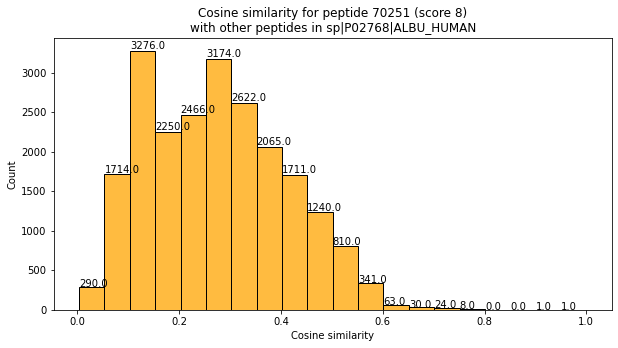

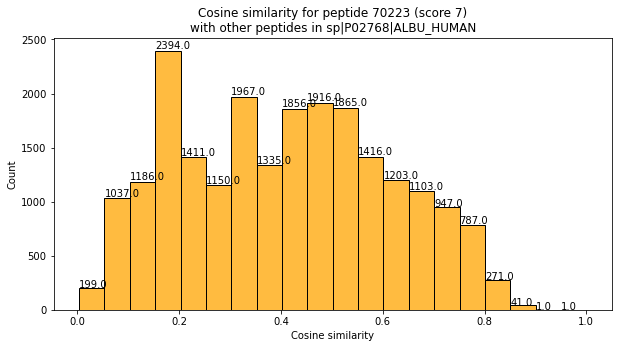

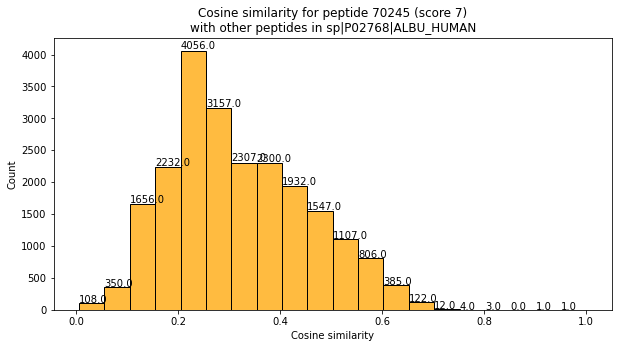

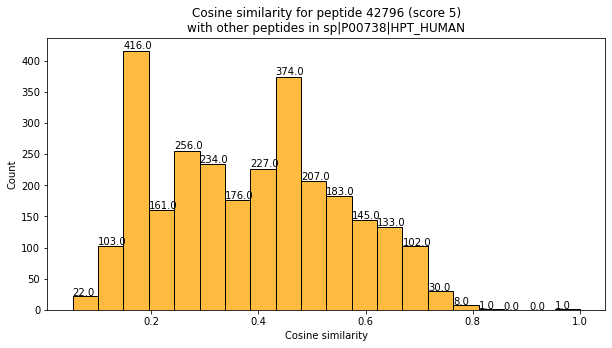

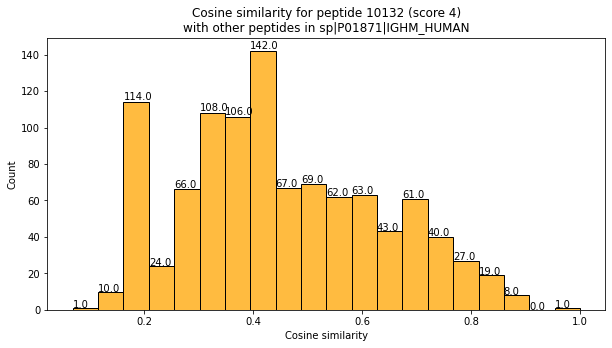

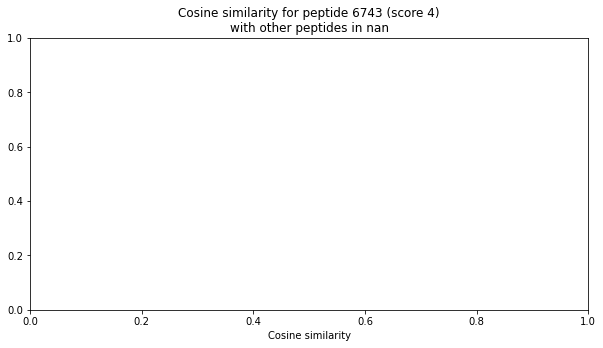

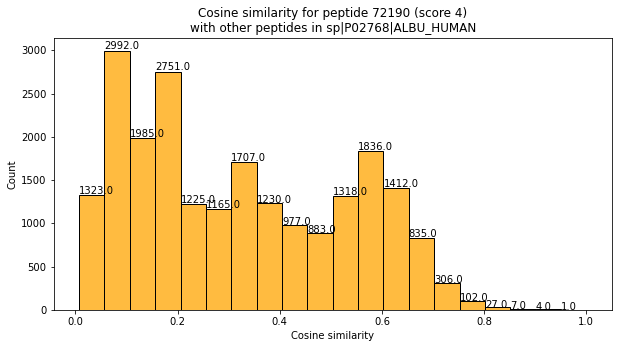

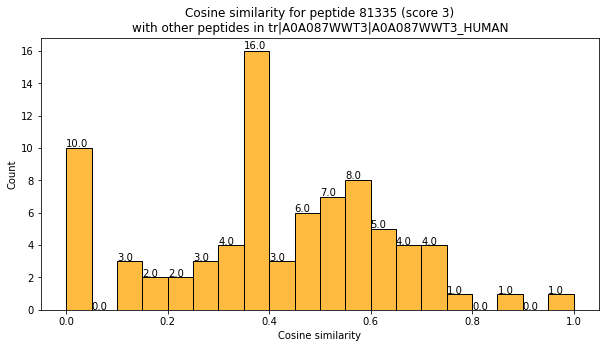

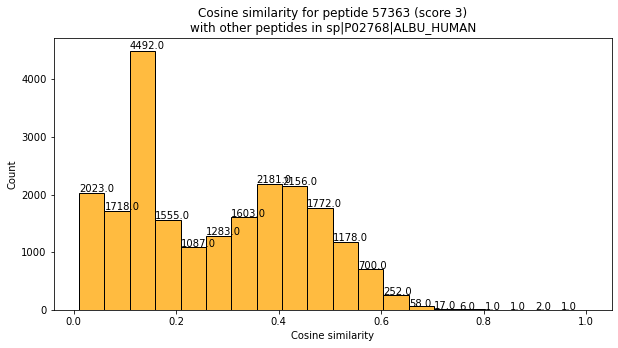

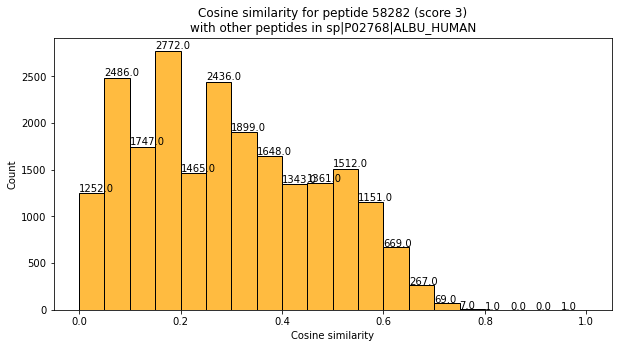

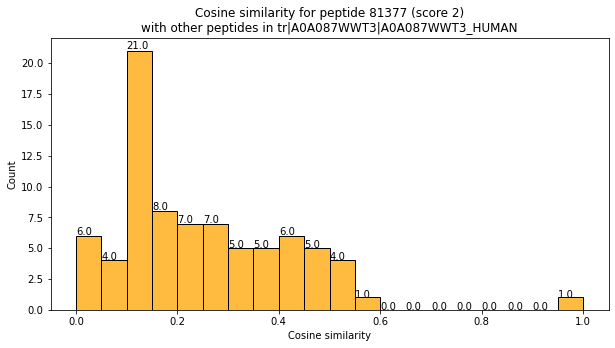

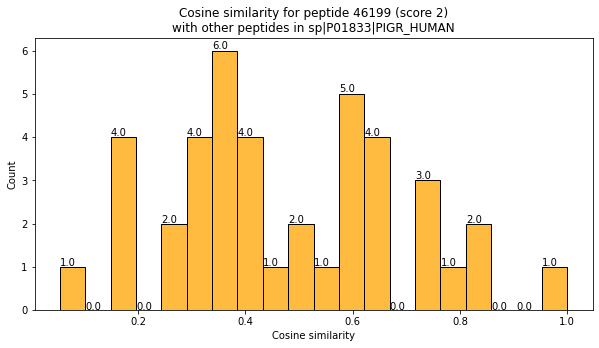

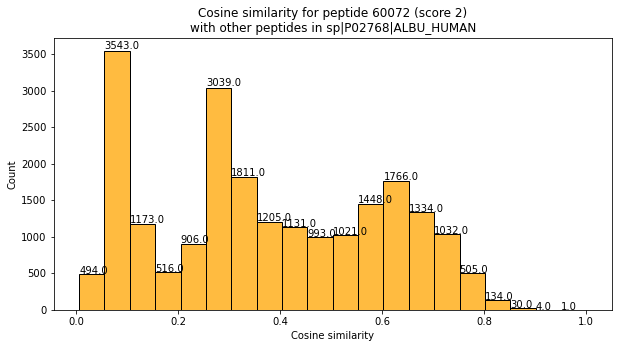

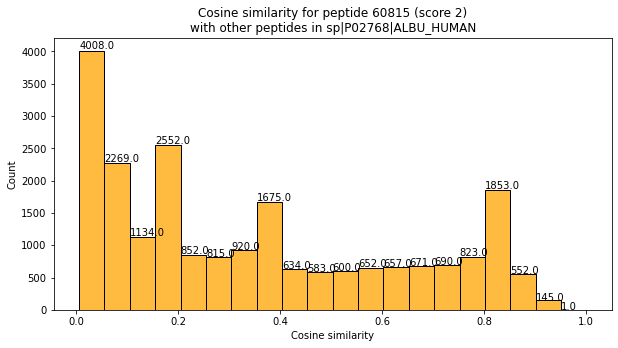

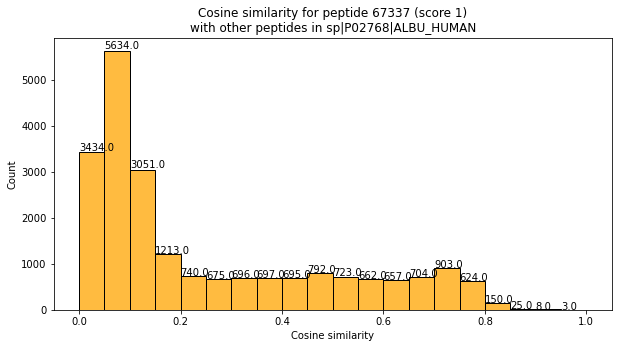

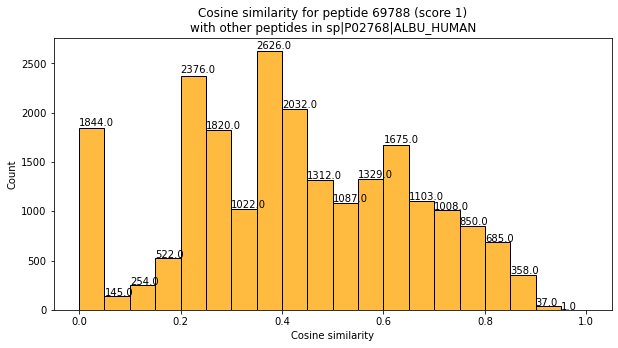

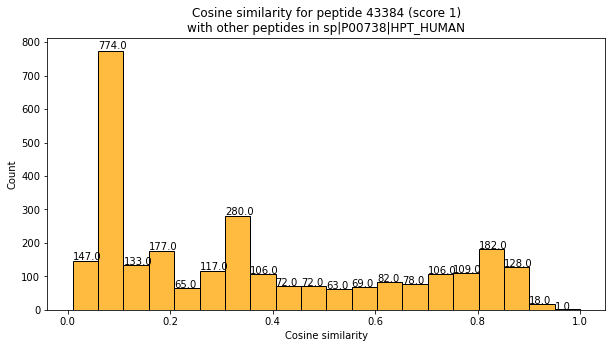

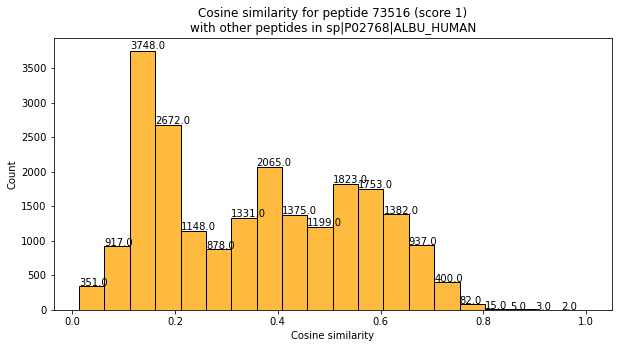

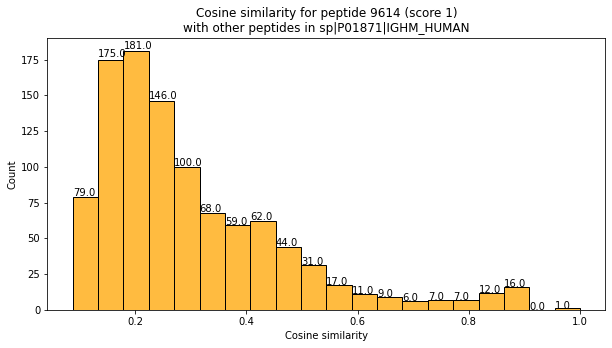

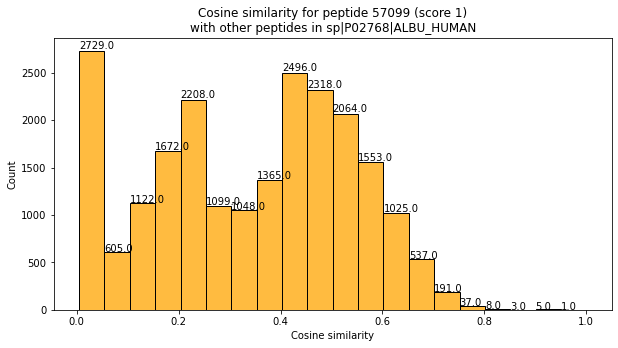

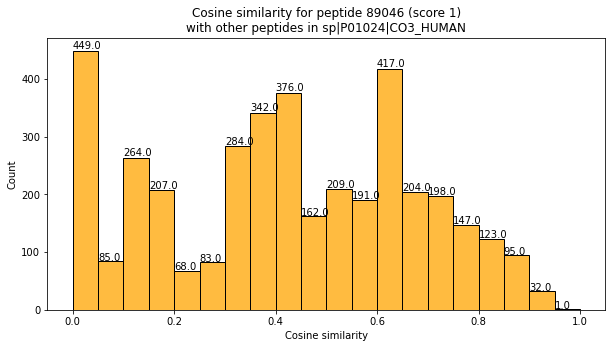

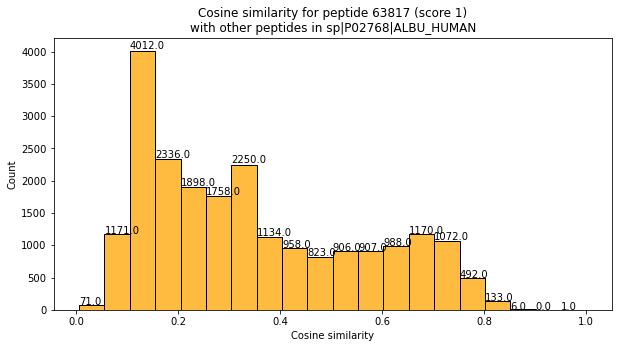

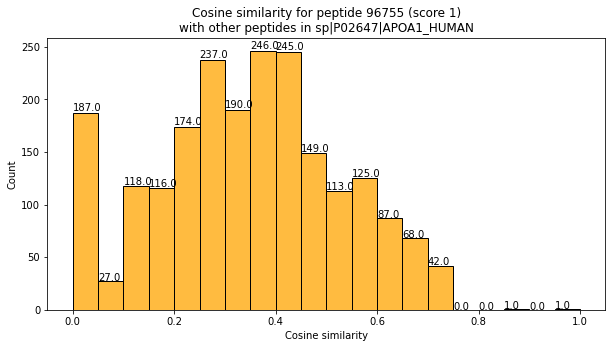

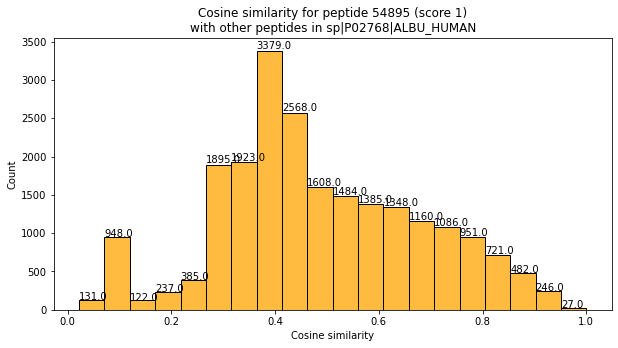

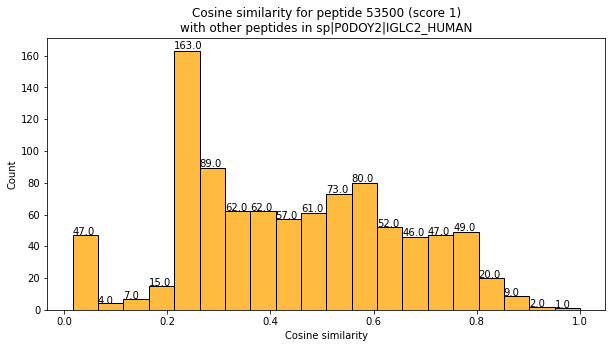

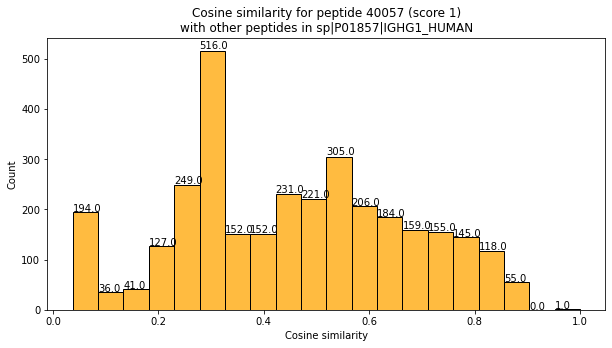

In [6]:
for peptide, score in impt:
    top_prot = prot.iloc[peptide]["Top_protein"]
    idxs = prot.index[prot["Top_protein"] == top_prot]
    keys = variants.iloc[:, idxs].to_numpy()
    keys = keys[:, ~np.all(keys == 0, axis=0)]
    query = variants.iloc[:, peptide].to_numpy()

    cosine = keys * query.reshape(-1, 1)
    cosine = cosine.sum(axis=0)
    cosine /= np.linalg.norm(query)
    cosine /= np.linalg.norm(keys, axis=0)

    plt.figure(figsize=(10, 5))
    plt.title(f"Cosine similarity for peptide {peptide} (score {score})\nwith other peptides in {top_prot}")
    plt.xlabel("Cosine similarity")
    ax = sns.histplot(cosine, bins=20, color="orange")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.01*p.get_height()))
    plt.show()